In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
data=pd.read_csv('ds_salaries.csv')

In [3]:
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [4]:
data.corr()  # prints the correlation coefficient between every pair of attributes

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


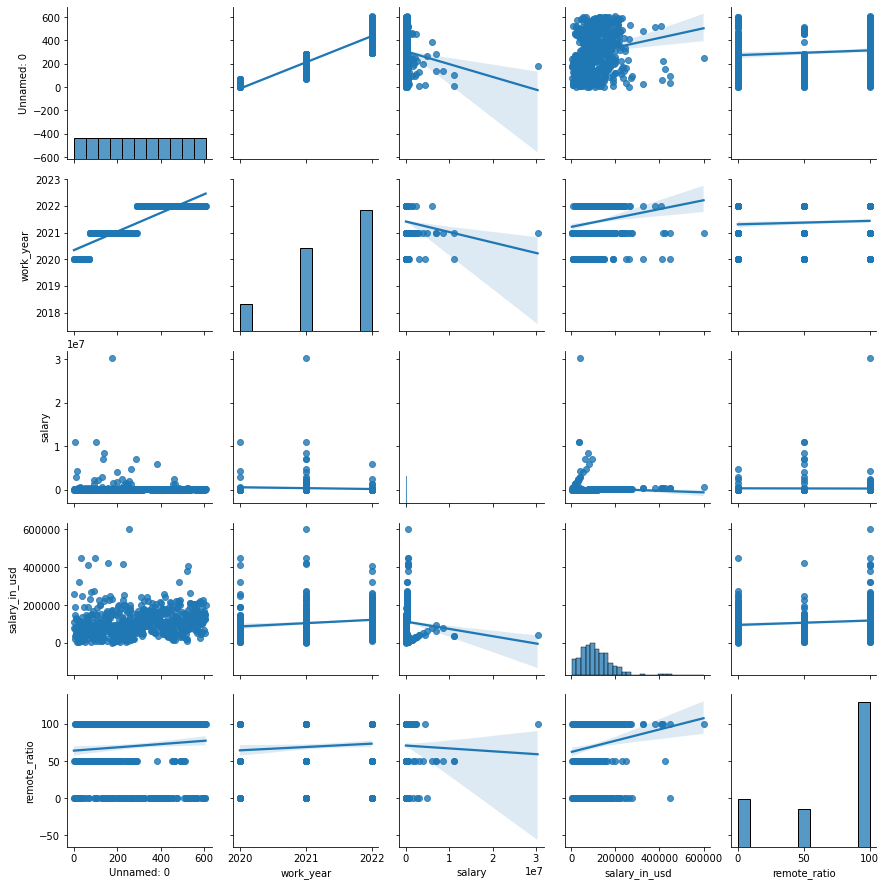

In [5]:
import seaborn as sns

sns.pairplot(data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

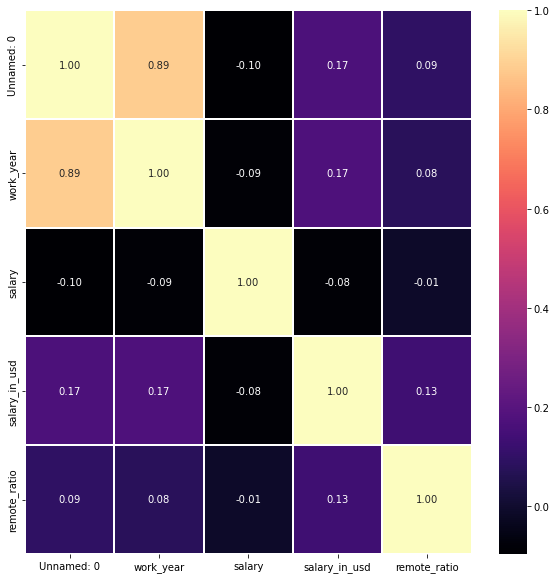

In [6]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
data['experience_level']=le.fit_transform(data['experience_level'])
data['employment_type']=le.fit_transform(data['employment_type'])
data['job_title']=le.fit_transform(data['job_title'])
data['salary_currency']=le.fit_transform(data['salary_currency'])
data['employee_residence']=le.fit_transform(data['employee_residence'])
data['company_location']=le.fit_transform(data['company_location'])
data['company_size']=le.fit_transform(data['company_size'])




In [9]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,70000,7,79833,14,0,12,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2,2020,3,2,7,85000,8,109024,20,50,18,1
3,3,2020,2,2,47,20000,16,20000,23,0,20,2
4,4,2020,3,2,38,150000,16,150000,55,50,48,0


In [10]:
data.drop(columns=data.columns[0],axis=1,inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


In [11]:
corr_matrix=data.corr()  # prints the correlation coefficient between every pair of attributes
corr_matrix

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.202420,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.199998,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.087365,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,-0.149591,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.120725,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959
salary_currency,0.202420,0.199998,-0.087365,-0.149591,-0.120725,1.000000,0.420550,0.758730,0.149746,0.787084,0.038849
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,0.420550,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.758730,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.149746,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.787084,0.428994,0.897704,0.169083,1.000000,-0.066554


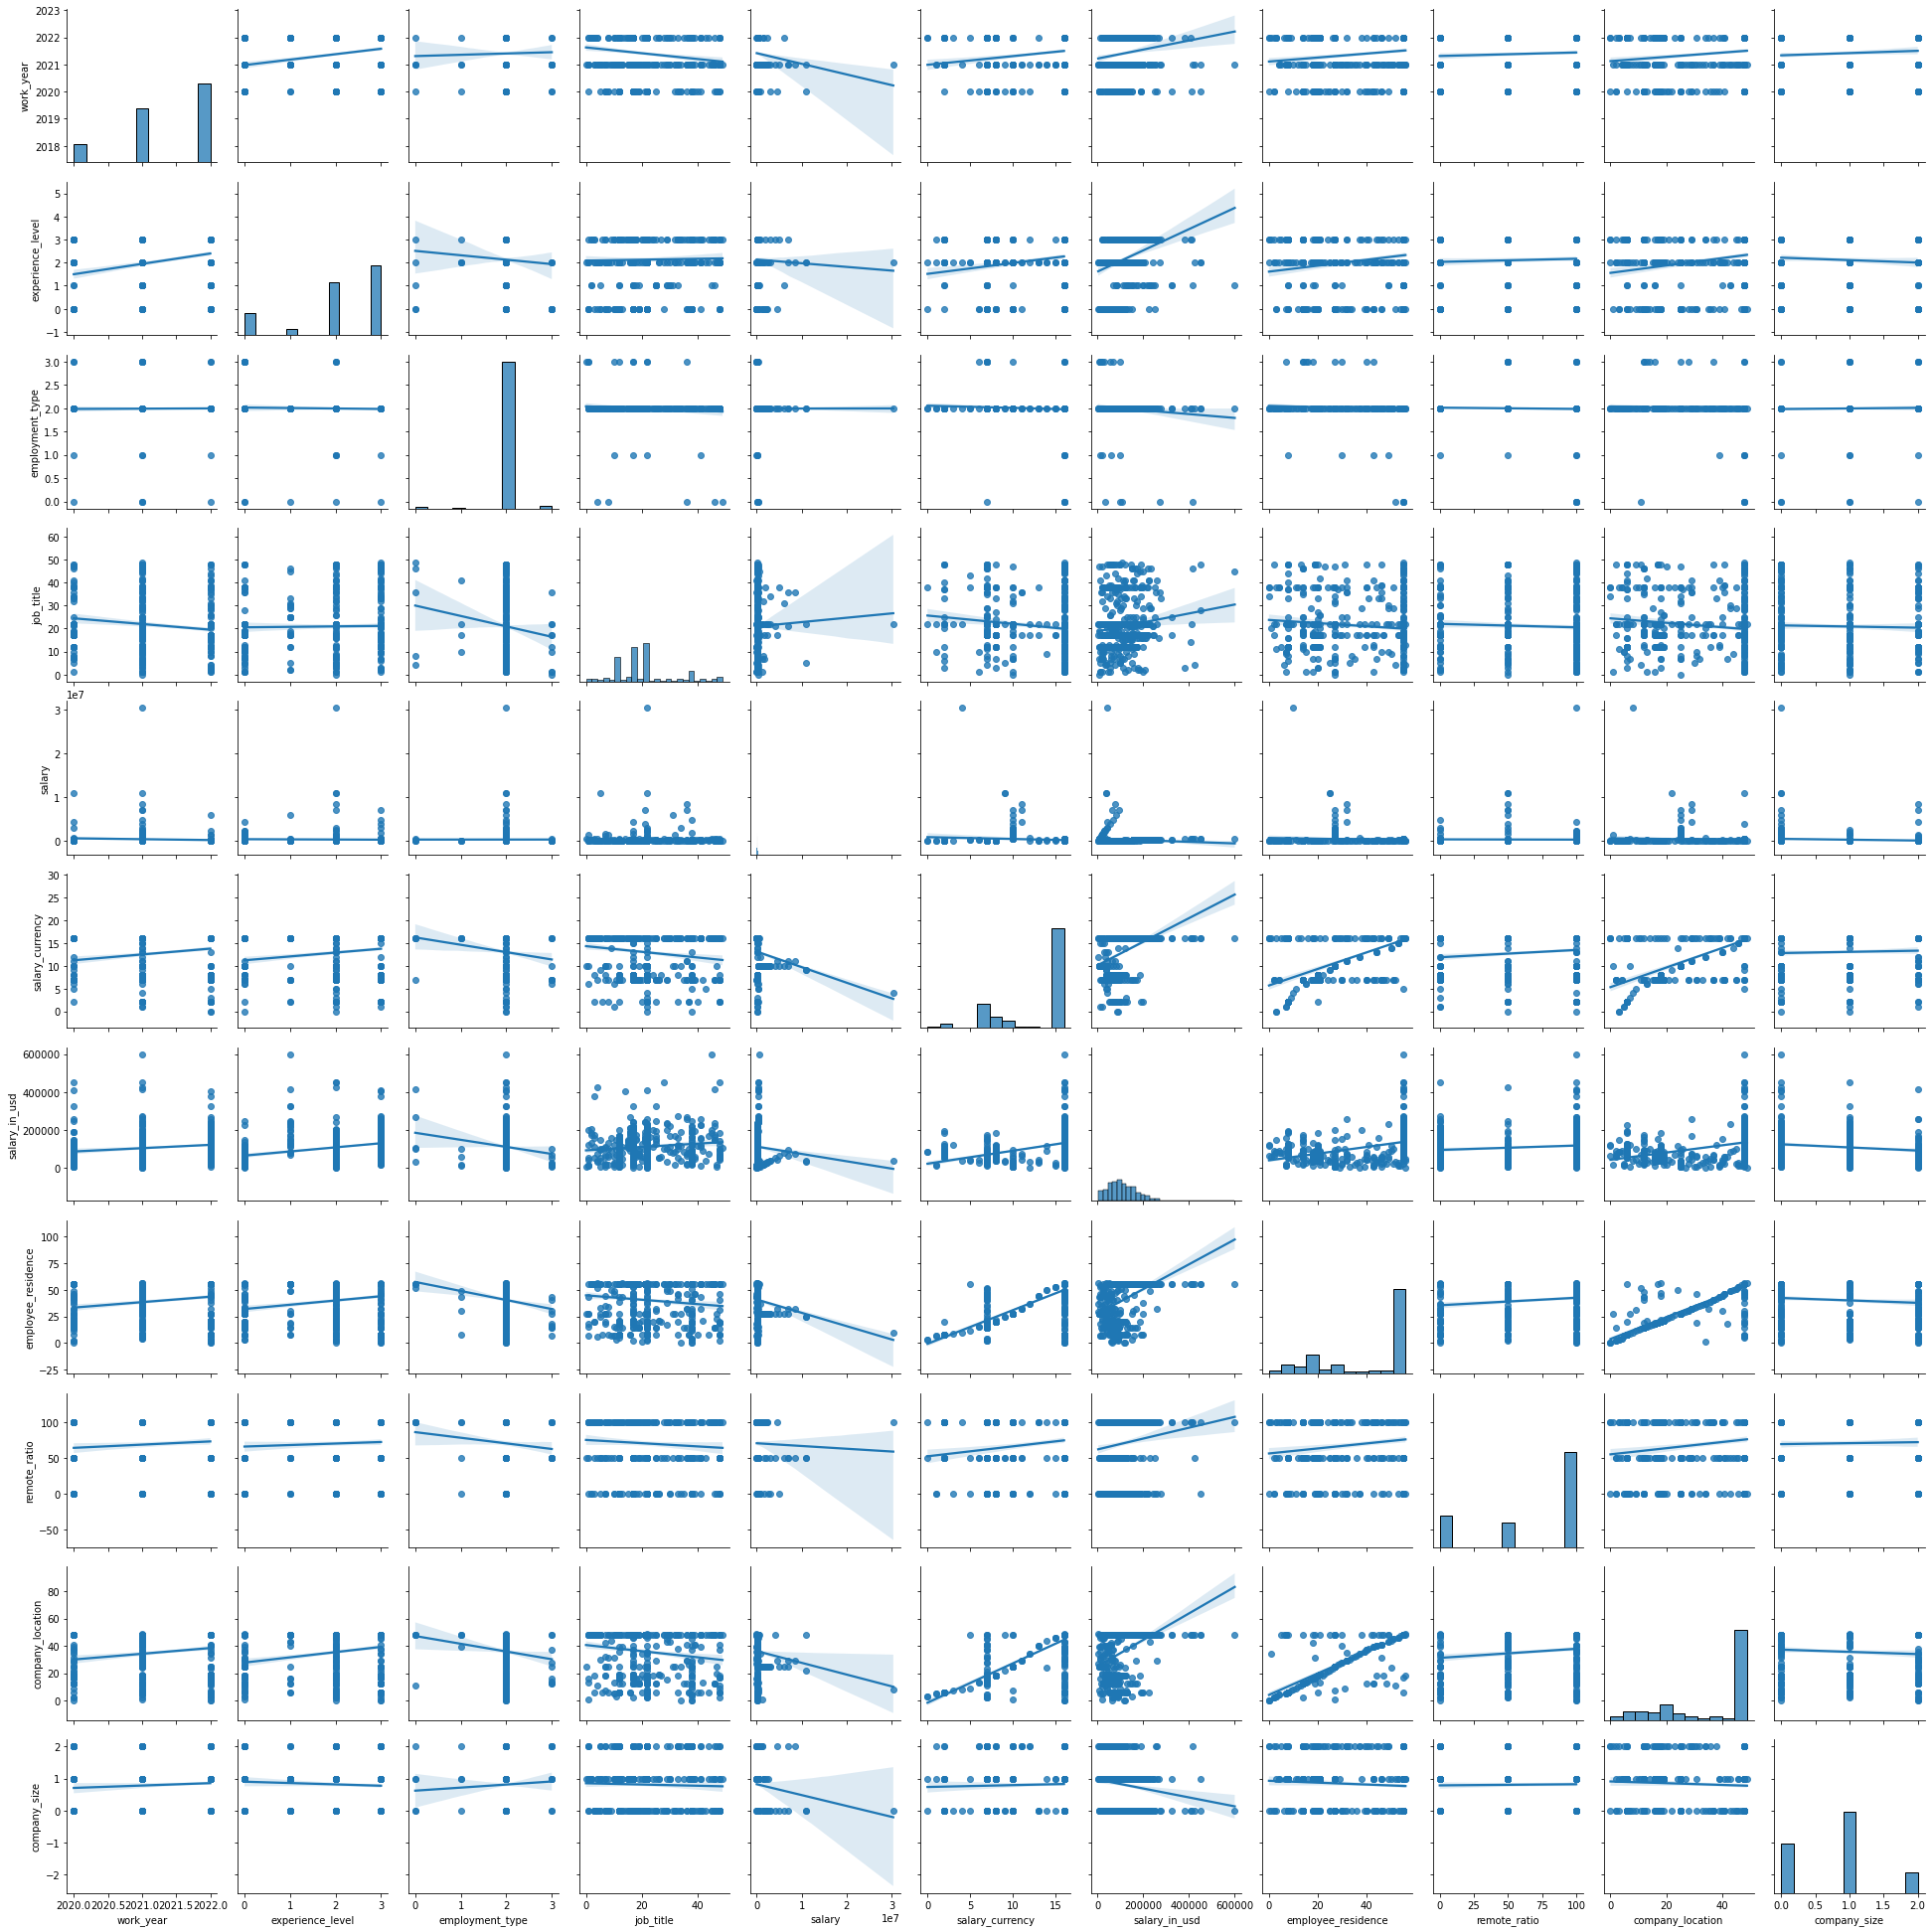

In [12]:
import seaborn as sns

sns.pairplot(data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

In [1]:
corr_matrix['company_location'].sort_values(ascending=False)

NameError: name 'corr_matrix' is not defined

In [ ]:
dataset1=data[["employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio","company_size","salary","employment_type", "job_title"  ]]
dataset2=data[["employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio"]]
dataset3=data[["employee_residence","salary_currency","salary_in_usd"]]

In [ ]:
corr_matrix['job_title'].sort_values(ascending=False)

In [ ]:
corr_matrix['employment_type'].sort_values(ascending=False)

In [ ]:
# if r > 0.9 (r < = -0.9) - Strong correlation
# else if  r >= 0.65 (r <= -0.65) - moderate correlation
# else  if  r >= 0.2 (r <= -0.2) -a weak correlation

In [ ]:
#work_year             
#nnamed: 0            0.167025
#remote_ratio          0.132122
#job_title  

In [ ]:
#data1 = data1.drop('remote_ratio', axis=1)
#data1 = data.drop(['job_title','remote_ratio','work_year'], axis=1)#'Unnamed'
data.drop(columns=data.columns[0],axis=1,inplace=True)
data.head()

In [ ]:
dataset1=data[[""]]
dataset2=data[[""]]
dataset3=data[[""]]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from PIL import Image 

# UNIVARIATE ANALYSIS

In [ ]:
dataset = data['salary']
len(dataset)

In [ ]:
dataset.isnull().sum()

In [ ]:
# The following code plots a histrogram using the matplotlib package.
# The bins argument creates class intervals. In this case we are creating 50 such intervals
plt.hist(dataset, bins=50)

In the above histogram, the first array is the frequency in each class and the second array contains the edges of the class intervals. These arrays can be assigned to a variable and used for further analysis.


In [ ]:
sns.distplot(dataset) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. The number of bins can also be manually set.

In [ ]:
sns.distplot(data, hist=False) # adding an argument to plot only frequency polygon

In [ ]:
sns.violinplot(dataset) # plots a violin plt using the seaborn package.

In [ ]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(dataset, color='g') # plots a simple histogram
plt.axvline(dataset.mean(), color='m', linewidth=1)
plt.axvline(dataset.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(dataset.mode()[0], color='w', linestyle='dashed', linewidth=1)

If we notice univariate analysis does not properly work with less dataset

# Spliting Data


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
y=data['company_location']
#X = data1[data1.columns.difference(['company_location'])]
X=data[['employee_residence','salary_currency']]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
#accuracy
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test, y_pred))

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
forest_clf= RandomForestClassifier(max_depth=7,random_state=0)
forest_clf.fit(X_train,y_train)
res_pred=forest_clf.predict(X_train)
accuracy_score(y_train, res_pred)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

NameError: name 'y_test' is not defined

In [17]:
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined